# Quantitative behavior of protein complexes 

In this chapter, we will look deeper into the same cancer data set and specifically look into the behavior of proteins known to form complexes. There is increasing consensus that most of these proteins are tightly regulated by selective degradation TODO paper. This leads to a) very similear quantitative changes and b) differences between the transcriptome and proteome.



### Reading the data

We will take the same data form the paper: https://www.ncbi.nlm.nih.gov/pubmed/30962452

Let's manually check some of the complexes also analyzed in the paper.

We will do that in a simplistic way which, on the other hand, also provide us with additional information. Fig. 3 in the paper shows patterns of the subunits of the following complexes:

First example: The MCM complex
Carry out hierarchical clustering (`heatmap`) for proteins that contain "MCM" in their name.

Second example: Condensin I complex
Carry out hierarchical clustering (`heatmap`) for proteins that contain "SCM" or "NCA" in their name.

You will get more than the proteins known to be subunits of the complex. Check whether the complex subunits show similar changes of their quantitative behavior.

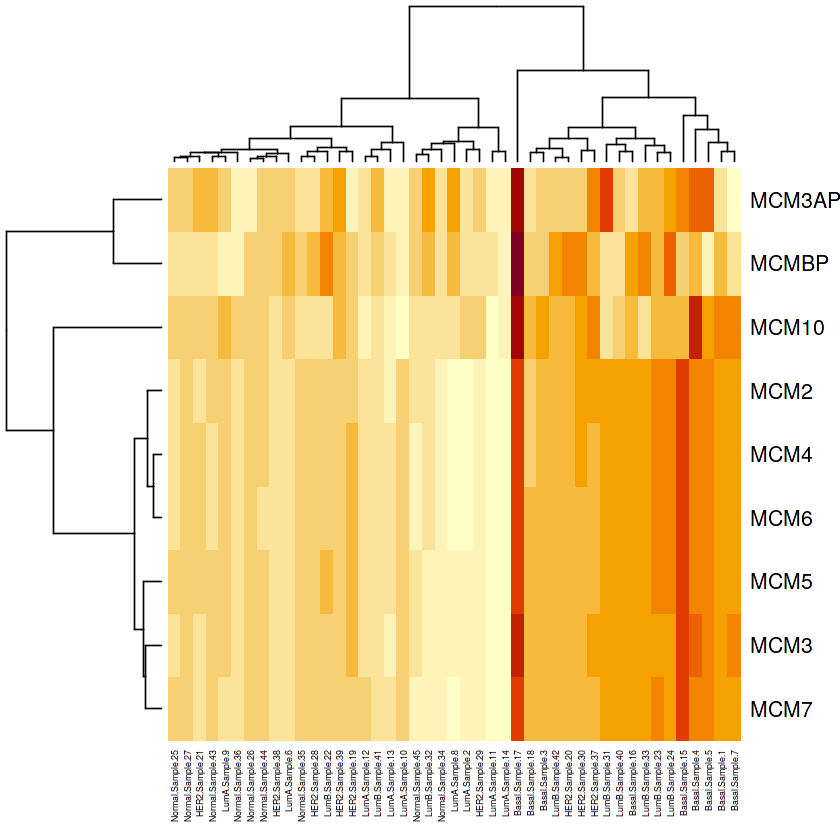

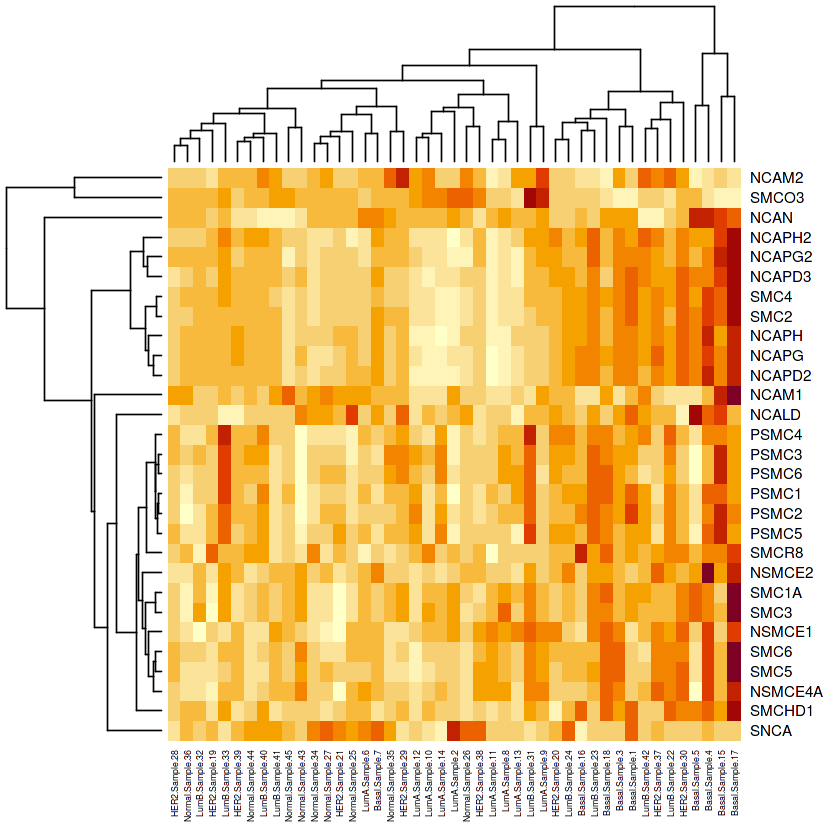

In [1]:
lQuantTable <-read.csv("../../../Data/PMC6453966_VSClust_in.csv",row.names=1)

# take all proteins containing "MCM" in their name
MCMComplex <- lQuantTable[grep("MCM",rownames(lQuantTable)),]
heatmap(as.matrix(MCMComplex), cexCol=0.5)


CondensinComplex <- lQuantTable[grep("NCA|SMC",rownames(lQuantTable)),]
heatmap(as.matrix(CondensinComplex), cexCol=0.5)



#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <ins>How similar is the behavior of the complex subunits? Does their behavior still separate the different cancer subtypes? What happens with the sample "Basal 17"? </ins>

_Answer_

##### Question II:  <ins>When looking at the plot of Condensin I (and others), do you identify the proteins of another complex? Which one is it?</ins>

_Answer_

##### Question III:  <ins>?</ins>

_Answer_



### Gene IDs and proteins

In order to continue working on this data set, we need to translate the gene names into protein accession numbers from UniProt as this is the common way to annotate proteins. 

In [16]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(biomaRt)
UniProtAccs <- bitr(rownames(lQuantTable), fromType="SYMBOL", toType="UNIPROT",OrgDb = org.Hs.eg.db)
UniProtAccs <- UniProtAccs[!duplicated(UniProtAccs$SYMBOL) ,]
UniProtAccs <- UniProtAccs[!duplicated(UniProtAccs$UNIPROT) ,]
head(UniProtAccs)
dim(UniProtAccs)
uQuantTable <- lQuantTable[UniProtAccs$SYMBOL,]
dim(uQuantTable)
rownames(UniProtAccs) <- UniProtAccs$SYMBOL
rownames(uQuantTable) <- UniProtAccs[rownames(uQuantTable),"UNIPROT"]

write.csv(uQuantTable,"../../../Data/PMC6453966_ComplexBrowser_in.csv")



'select()' returned 1:many mapping between keys and columns
Warning message in bitr(rownames(lQuantTable), fromType = "SYMBOL", toType = "UNIPROT", :
“4.67% of input gene IDs are fail to map...”

,SYMBOL,UNIPROT
,<chr>,<chr>
1,A1BG,P04217
3,A2M,P01023
4,A2ML1,A8K2U0
6,AAAS,Q9NRG9
7,AACS,Q86V21
10,AAGAB,Q6PD74


[1] 9526    2

[1] 9526   45

#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <ins></ins>

_Answer_

##### Question II:  <ins>?</ins>

_Answer_

##### Question II:  <ins>?</ins>

_Answer_



In [ ]:


rownames(lQuantTable)
UniProtAccs <- UniProtAccs[!duplicated(UniProtAccs[,2]),]
sum(duplicated(UniProtAccs[,1]))
head(UniProtAccs)
uQuantTable <- lQuantTable[UniProtAccs[,1],]
rownames(UniProtAccs) <- UniProtAccs[,2]


In [ ]:
UniProtAccs <- getBM(attributes=c("uniprotswissprot", "hgnc_symbol", "uniprot_gn_symbol"), filters="hgnc_symbol", 
                    values=rownames(lQuantTable), mart=ensembl)

UniProtAccs <- UniProtAccs[UniProtAccs$uniprotswissprot != "",]
dim(UniProtAccs)
head(UniProtAccs)